<a href="https://colab.research.google.com/github/001ckk/Hass-Consulting-Company-/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_07_Christopher_Kimani_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HASS CONSULTING COMPANY**

#**Introduction.**

**Specifying the question.**

A study of the factors that affect housing prices using the given information on real estate properties that was collected over the past few months and creating a model that would allow our company to accurately predict the sale of prices upon being provided with the predictor variables. 

**Metric of success**

Obtaining the model with the highest accuracy 

**Context**

House prices have consisently been on the rise. These prices are influenced by so many factors. The purpose of this study is to analyse the house_data dataset, study it and find out which factors have a major impact on house prices, and find the best model with a highest accuracy to predict the future of house prices.

**Experimental design**

1. Perform your EDA
2. Check of multicollinearity
3. Build different models
4. Cross-validate the models
5. Compute RMSE
6. Create residual plots for your models, and assess their heteroscedasticity 
7. Challenge your solution by providing insights on how you can make      improvements.

**Data Relevance**

The data set can be found on  [this link](https://)

#**Data loading and data cleaning**

In [153]:
#Importing Libraries for our Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split as tts
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings(action='ignore')

In [154]:
housing_data = pd.read_csv('housing_data.csv')
housing_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [155]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [156]:
# There are 20 columns and 21613 rows
# There are no missing values in this data
# From this results, the data types in each column are clearly visible.

**Checking the data and data cleaning**

In [157]:
# checking for duplicates and dropping them.

print(housing_data.duplicated().sum())
housing_data.drop_duplicates(inplace=True)
print(housing_data.shape)

# There were 3 duplicated entries which I dropped and the new number of rows are 21610. 

3
(21610, 20)


In [158]:
# Changing the price, bathroom and floors column from float to integers since it doesn't make sense to have float values for these columns.

housing_data = housing_data.astype({"price":'int', "bathrooms":'int',"floors":'int'}) 
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  int64  
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  int64  
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  int64  
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

In [159]:
# checking outliers 

q1 = housing_data.quantile(0.25)
q3 = housing_data.quantile(0.75)
iqr = q1 - q3 
outliers = housing_data[((housing_data < (q1 - 1.5*iqr))|(housing_data > (q3 + 1.5*iqr)))]
outliers.count()

id               21610
price            21610
bedrooms         21610
bathrooms        21610
sqft_living      21610
sqft_lot         21610
floors           21610
waterfront         163
view              2123
condition        21610
grade            21610
sqft_above       21610
sqft_basement    21610
yr_built         21610
yr_renovated       913
zipcode          21610
lat              21610
long             21610
sqft_living15    21610
sqft_lot15       21610
dtype: int64

In [160]:
# Checking unique values in the data set 

housing_data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms            9
sqft_living       1038
sqft_lot          9782
floors               3
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

#**Exploratory Data Analysis**

**Univariate Analysis**

In [161]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,1.749745,2079.881212,1.510829e+04,1.446136,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.734902,918.500299,4.142323e+04,0.551893,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.000000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.619000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


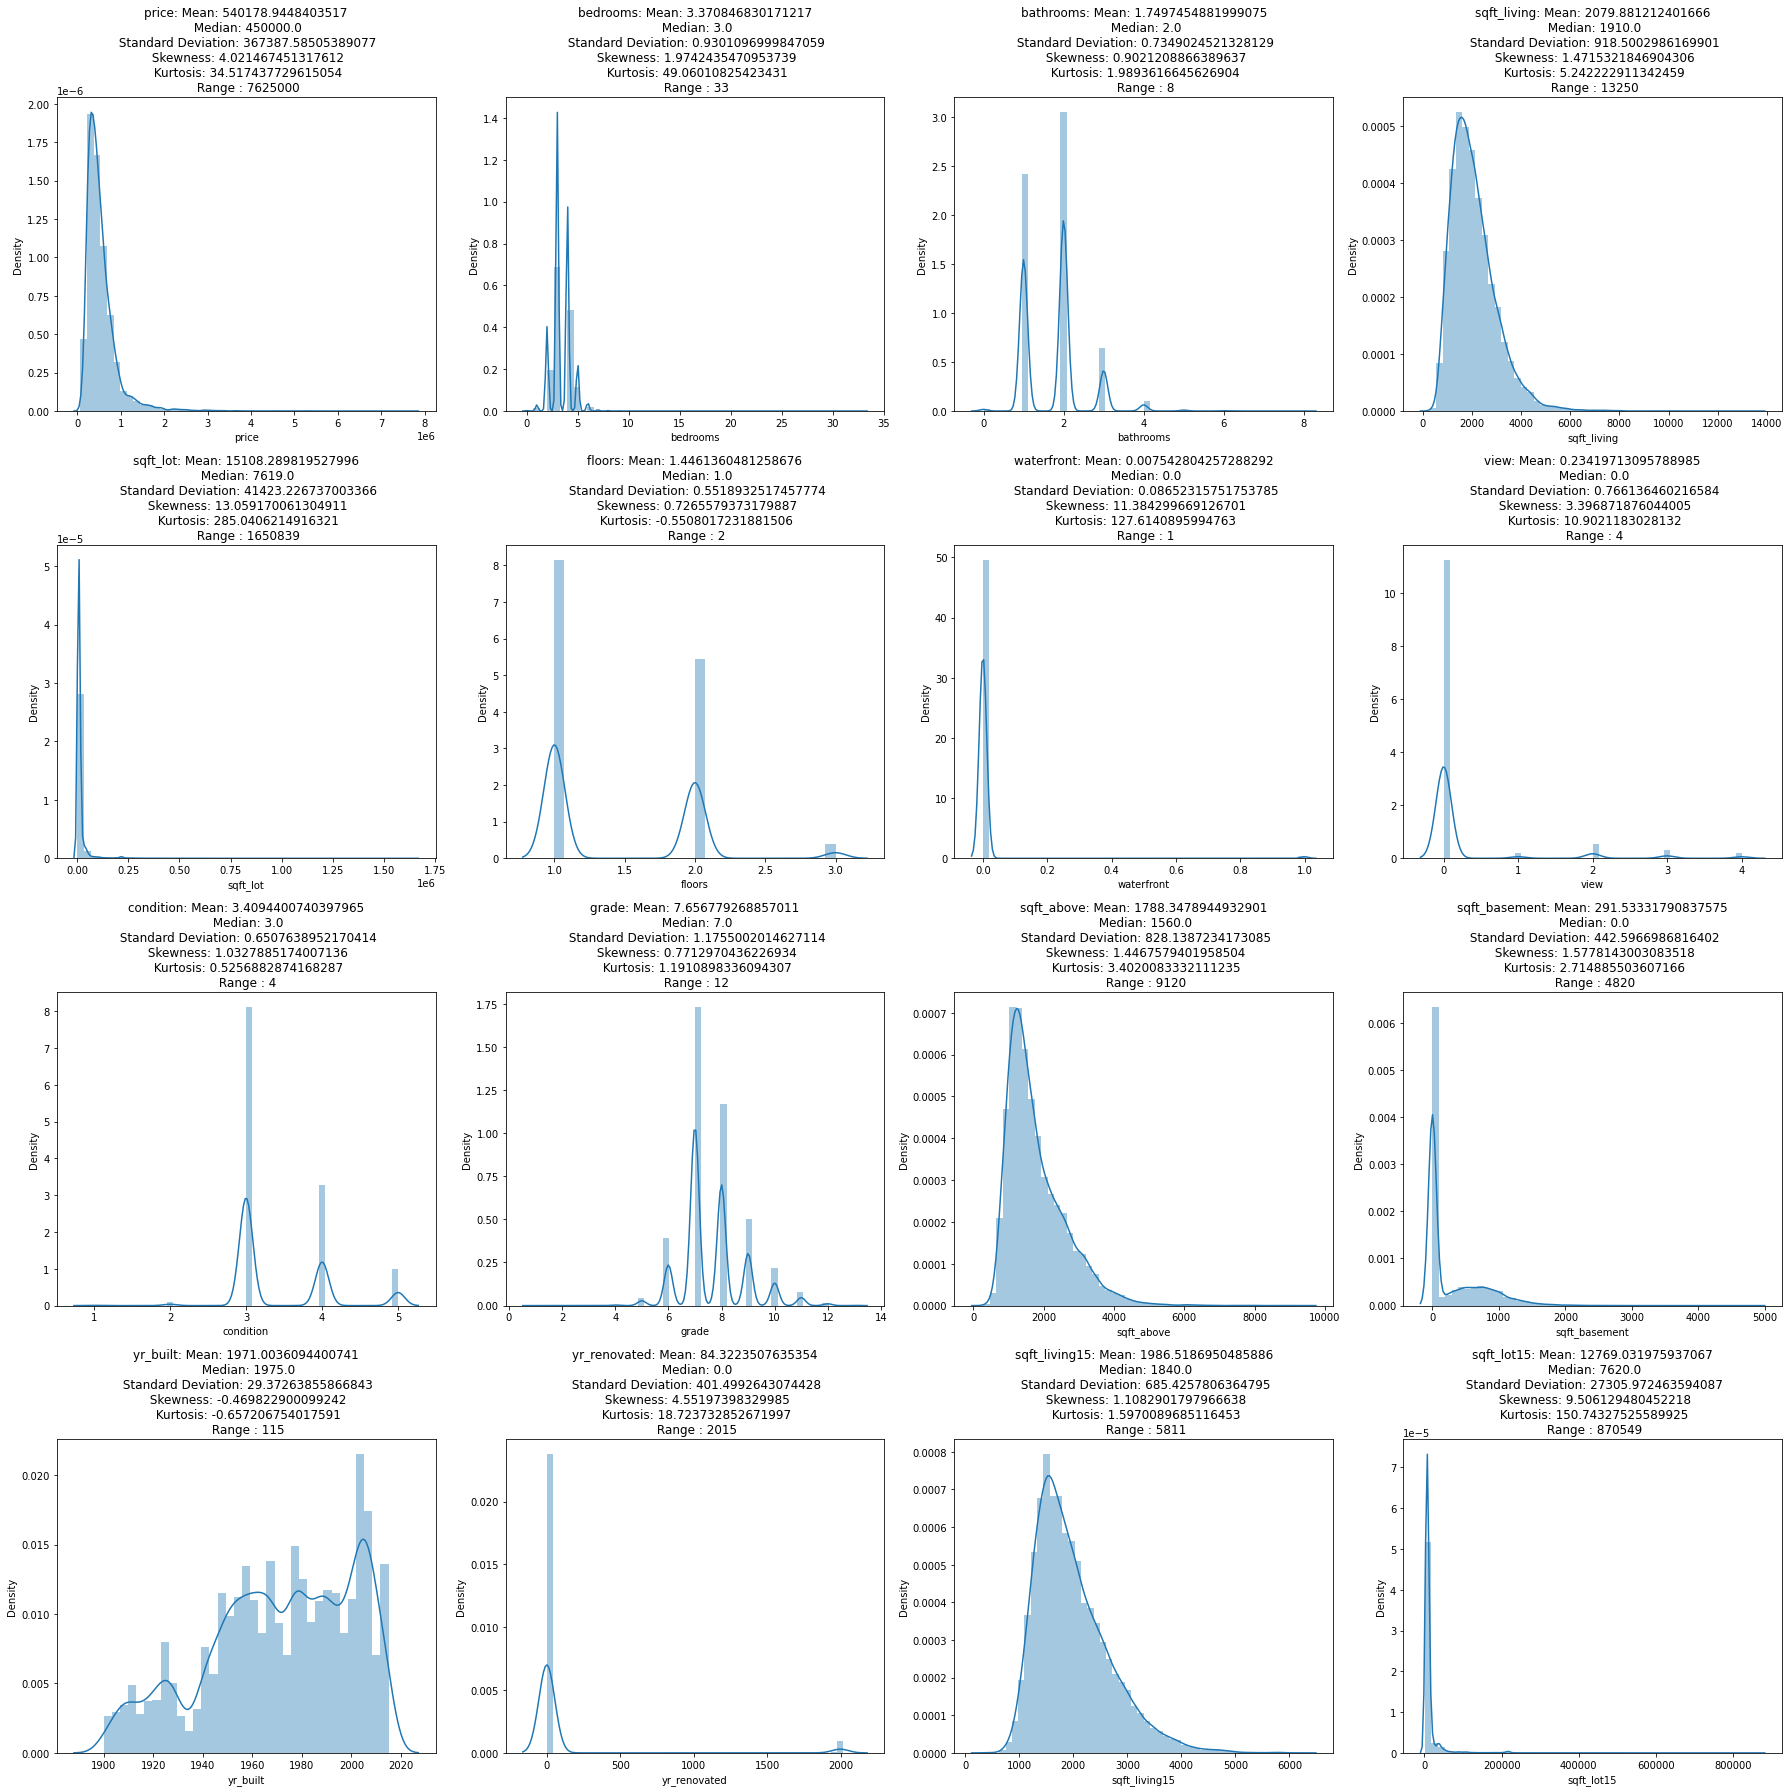

In [162]:
#plotting summaries of the numerical columns from the dataset

housing_data1 = housing_data.loc[:, ~ housing_data.columns.isin(['id','lat', 'long','zipcode'])]

num_var = housing_data1.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))

for col, ax in zip(num_var, axes.flatten()):

  mean = housing_data1[col].mean()
  median = housing_data1[col].median()
  standard_var = housing_data1[col].std()
  skew = housing_data1[col].skew()
  kurt = housing_data1[col].kurt()
  range = housing_data1[col].max() - housing_data1[col].min()

  sns.distplot(housing_data1[col], hist=True, ax=ax)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Range : {range}')

plt.tight_layout()

In [163]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  int64  
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  int64  
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  int64  
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

**Bivariate Analysis**

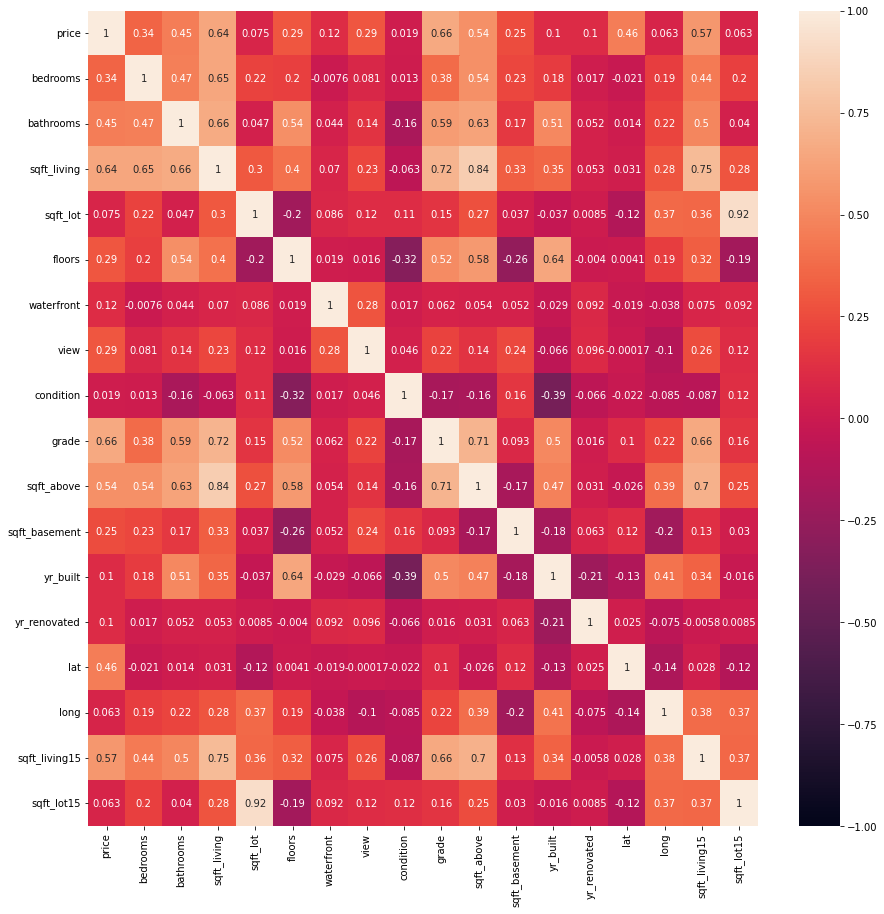

In [164]:
correlation = housing_data.drop(housing_data.columns[[0, 15]],axis = 1).corr(method = 'spearman')
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)
plt.show()

# This shows the correlation between the variables.
# I dropped the id and zipcode column since they were unique values.

**VIF**

In [165]:
#drop columns i dont need
drop=['id','lat','zipcode','long','yr_built','yr_renovated','sqft_lot']
housing_data = housing_data.drop(drop, axis=1)

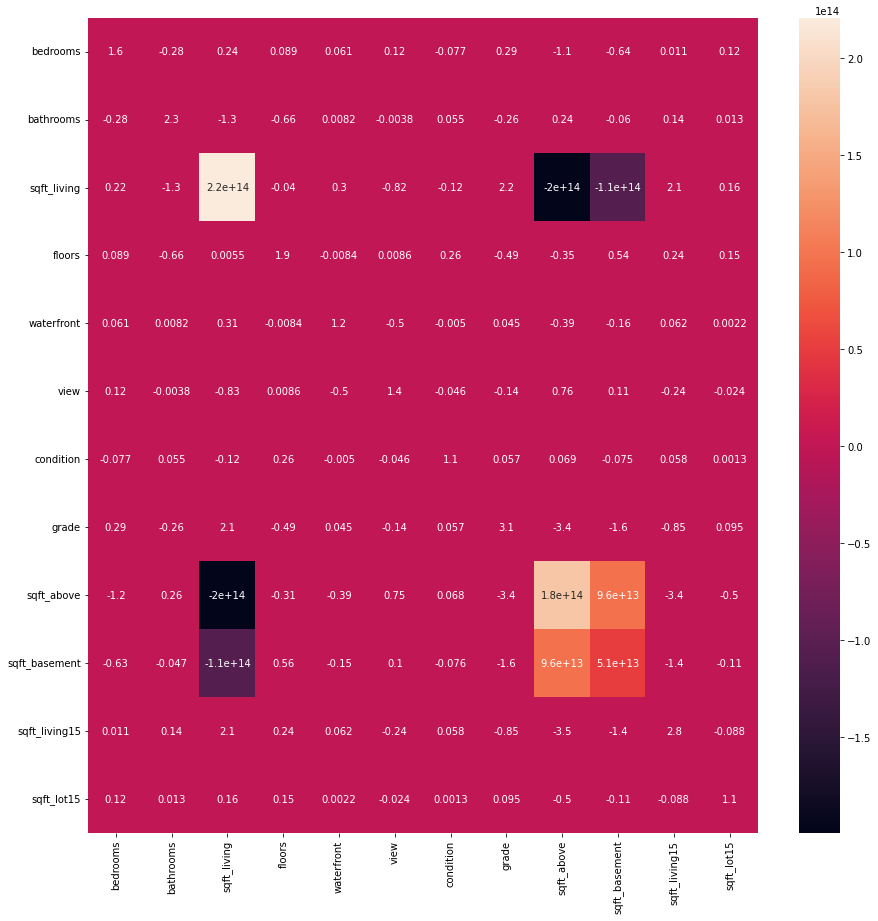

In [166]:
#check for VIF variance inflation factor using a correlation matrix
vif_matrix = housing_data.drop('price', axis=1).corr()
vif = pd.DataFrame(np.linalg.inv(vif_matrix), index=vif_matrix.index, columns=vif_matrix.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

# From this, sqft_bassement and sqft_above have a high variance adn thus they need to be dropped.

In [167]:
#dropping sqft_above and sqft_bbasement and id 
housing_data.drop(['sqft_above','sqft_basement'], axis=1, inplace=True)


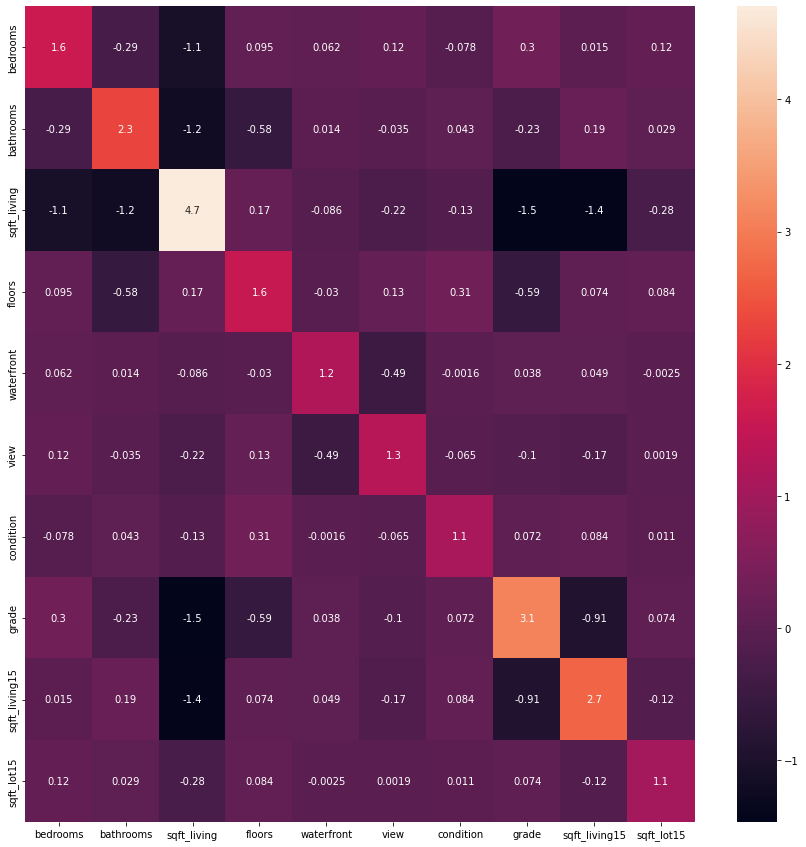

In [168]:
# Checking the variance inflation factor after dropping those columns with extreme VIF
vif_matrix = housing_data.drop('price', axis=1).corr()
vif = pd.DataFrame(np.linalg.inv(vif_matrix), index=vif_matrix.index, columns=vif_matrix.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

#**Regressions**

**1. Ordinary Linear Regression**

In [169]:
housing_data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15
0,221900,3,1,1180,1,0,0,3,7,1340,5650
1,538000,3,2,2570,2,0,0,3,7,1690,7639
2,180000,2,1,770,1,0,0,3,6,2720,8062
3,604000,4,3,1960,1,0,0,5,7,1360,5000
4,510000,3,2,1680,1,0,0,3,8,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,3,0,0,3,8,1530,1509
21609,400000,4,2,2310,2,0,0,3,8,1830,7200
21610,402101,2,0,1020,2,0,0,3,7,1020,2007
21611,400000,3,2,1600,2,0,0,3,8,1410,1287


In [170]:
# Obtaining values for x and y 

x = housing_data.iloc[: , 2:11].values
y = housing_data.iloc[: , [1]].values

In [171]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [172]:
# Linear regression.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the y

y_pred = regressor.predict(x_test)
print(regressor.intercept_)
print('*****')
print(regressor.coef_)


# An increase in any of the x values will cause a B's change in the y value 


[2.71305285]
*****
[[ 2.35012316e-01  6.58379493e-04 -9.65791924e-02 -3.95462897e-01
  -9.28149279e-02  6.55050165e-02 -1.52406249e-01  8.32929637e-06
  -2.62609685e-06]]


In [173]:
from sklearn import metrics

# Obtaining the RMSE - Root mean squared error

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.796640614783461


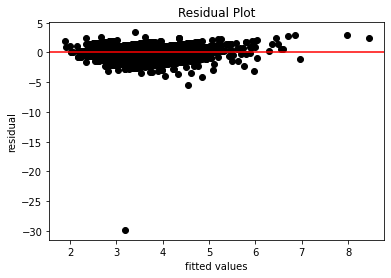

In [174]:
residuals = y_pred - y_test

# Plotting the prediction errors
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

In [175]:
y_pred = y_pred[:,0]
residuals = residuals[:,0]

In [176]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous! (homoskedasticity)')

717.6947099683181
the variances are homogeneous! (homoskedasticity)


**2. Ridge Regression**

In [177]:
# Obtaining values for x and y 

x = housing_data.iloc[: , 2:11]
y = housing_data.iloc[: , [1]].values

In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [179]:
# get the potential alpha values

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_val = np.logspace(-5,3,10)
ridgereg = Ridge()

grid_ridge = GridSearchCV(ridgereg, param_grid={'alpha':alpha_val}, scoring='neg_mean_squared_error', cv=10, refit=True)

In [180]:
# best score?
grid_ridge.fit(x_train, y_train)
print(grid_ridge.best_params_,  np.sqrt(abs(grid_ridge.best_score_)))

{'alpha': 2.154434690031882} 0.7037750654371943


In [181]:
ridgereg = Ridge(alpha=0.2782559402207126).fit(x_train,y_train)
#get the R-squared Score
ridgereg.score(x_test,y_test)

0.3392532387585082

In [182]:
coef_dict_baseline = {}
for coef, feat in zip(ridgereg.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': array([ 2.34994624e-01,  6.58381104e-04, -9.65726004e-02, -3.94253987e-01,
        -9.28647731e-02,  6.55025364e-02, -1.52397849e-01,  8.32765366e-06,
        -2.62609943e-06])}

**3. Lasso Regression**

In [183]:
#Lasso regression shall bring out some of the most vital variable features and also it perfoms well compared to Ridge and Linear regression
from sklearn.linear_model import Lasso

lassoreg = Lasso()
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
grid_lasso = GridSearchCV(lassoreg, parameters, scoring ='r2') 

In [184]:
#get my alpha values
grid_lasso.fit(x_train, y_train)
print(grid_lasso.best_params_, grid_lasso.best_score_)

{'alpha': 0.30000000000000004} 0.357944915877376


In [185]:
# Train Lasso regressor
grid_lasso = Lasso(alpha=0.1)
grid_lasso.fit(x_train, y_train)
print(grid_lasso.score(x_test, y_test))
print( np.sqrt(mean_squared_error(y_test,grid_lasso.predict(x_test))))

0.3096711952379573
0.8142786050380505


**4. Elastic Net Regression**

In [186]:
from sklearn.linear_model import ElasticNet

#set X and Y variables
X = housing_data.drop(['price'], axis=1)
Y = housing_data['price']

# Split data
x_train, x_test, y_train, y_test = tts(X, Y, test_size=.2, random_state=24)

In [187]:
#determine the best alpha
elastic=ElasticNet(normalize=True)
grid_elastic = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='r2',n_jobs=1,refit=True,cv=10)

In [188]:
grid_elastic.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='r2')

In [189]:
# print best alpha
grid_elastic.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [190]:
# best score
grid_elastic.best_score_

0.6078957063532054

In [191]:
elastic_reg = ElasticNet(alpha=1e-05, l1_ratio=0.8).fit(x_train, y_train)
print(f'R2: {elastic_reg.score(x_test, y_test)}')

R2: 0.5989834075949456


In [192]:
#print coefficients for each features
column_names = X.columns.to_list()
coefficients = dict(zip(column_names, elastic_reg.coef_))

sort_coefficients = sorted(coefficients.items(), key=lambda x: x[1])

for i in sort_coefficients:
	print(i[0], i[1])

floors -48215.60306624257
bedrooms -40091.07299845087
sqft_lot15 -0.7799714566916277
sqft_living15 5.780606598537385
sqft_living 184.32866297822176
bathrooms 29438.048532824036
condition 52092.74148103004
view 60915.58468806661
grade 100754.22756839555
waterfront 602147.4080578906


#**Conclusion**

Elastic Net Regression is the best fo multiple in this case.

#**Follow up question**



*   **Did we have the right data ?**
*   **Do we need other data to answer our question ?**

*   **Did we have the right question ?**




